# (bstudent) marginal notebook for notes, derivations, and demos

## For ageron handson-ml2 book & website

These are my equivalent of scribbling in the margins of a math book.

### A note on equations: 

E-book editions of this book tend to have misrendered equations.

**See: ageron's included notebook `book_equations.ipynb` for correctly-rendered equations.**

### (bstudent) (ch 05) SVM & Kernel Trick

#### From wikipedia article https://en.wikipedia.org/wiki/Kernel_method

-----------------

The kernel trick avoids the explicit mapping that is needed to get linear learning algorithms to learn a nonlinear function or decision boundary. For all 
$\mathbf {x}$ and $\mathbf {x'}$ in the input space $\mathcal {X}$, certain functions $k(\mathbf {x} ,\mathbf {x'} )$ can be expressed as an inner product in another space $\mathcal {V}$. 
The function $k\colon \mathcal {X} \times \mathcal {X} \to \mathbb {R}$  is often referred to as a kernel or a kernel function. The word "kernel" is used in mathematics to denote a weighting function for a weighted sum or integral.

Certain problems in machine learning have more structure than an arbitrary weighting function $k$. The computation is made much simpler if the kernel can be written in the form of a "feature map" $\varphi \colon \mathcal {X} \to \mathcal {V}$ which satisfies:  

* $k(\mathbf {x} ,\mathbf {x'} )=\langle \varphi (\mathbf {x} ),\varphi (\mathbf {x'} )\rangle _{\mathcal {V}}$

-----------------

#### (bstudent):

This means that the function $\varphi (\mathbf {x})$ maps the $p$-dimensional vector $\mathbf {x}$ to a (generally) higher-dimensional $m$-vector $\mathbf {v}$ or to an infinite-dimensional function space and (??) does not necessarily do so linearly.  For conceptualization, let's stick with the idea of mapping to $m$-vector $\mathbf v$.  Then $k(\mathbf {x} ,\mathbf {x'} ) = \mathbf v^T \mathbf v'$, where the function mapping from$\mathbf {x}$ to $\mathbf {v}$, $\mathbf v = \varphi (\mathbf {x})$, can be nonlinear and quite convoluted.  
  
***The kernel trick is a "trick" in the sense that for algorithms like SVM we don't necessarily need to figure out the formula for $\varphi (\mathbf {x})$, we only need apply kernel function $k(\dots)$ to the inner product $\mathbf x^T \mathbf x'$.***

### (bstudent) (ch 04) Deriving Normal Equation and Gradient for Descent:

$\hat\theta = \displaystyle\min_{\theta} \frac{1}{N} \mathbf{\epsilon}^T\mathbf{\epsilon}$  
  
$\hat\theta = \displaystyle\min_{\theta} \frac{1}{N} (\mathbf{\hat y} - \mathbf{y})^T (\mathbf{\hat y} - \mathbf{y})$  
  
$\mathbf{\hat y} = \mathbf{X}\mathbf{\theta}$

$\implies \nabla_\theta \frac{1}{N} (\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}) = \mathbf{0}$  

Minimum occurs where:  

$\nabla_\theta \frac{1}{N} (\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}) = \frac{1}{N} \left( 2 \mathbf{X}^T\mathbf{X}\mathbf{\theta} - 2 \mathbf{X}^T\mathbf{y}\right) = \mathbf{0}$  

$\implies \mathbf{X}^T\mathbf{X}\hat\theta = \mathbf{X}^T\mathbf{y}$  

$\implies \hat\theta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$  
(The "normal equation")  

For general gradient at points other than $\hat\theta$, the "gradient" in MSE gradient descent is:    

$\nabla_\theta \frac{1}{N} \left(\mathbf{X}\mathbf{\theta}-\mathbf{y})^T(\mathbf{X}\mathbf{\theta}-\mathbf{y}\right) = \frac{2}{N} \mathbf{X}^T \left(\mathbf{X}\mathbf{\theta} - \mathbf{y} \right)$

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Used in the next section for illustration, putting the code here to get it out of the way.

In [45]:
# This function is repurposed from the code for fig 4-21 and used to show why  
# the logistic function's "true" error and associated gradients are not optimal 
# for iterative methods.
def plot_sigmoid_gradients():
    t = np.linspace(-10, 10, 100)
    sig = 1 / (1 + np.exp(-t))
    dsy0 = sig*(1-sig)
    dsy1 = -dsy0
    logcosty0 = -np.log(1-sig)
    logcosty1 = -np.log(sig)
    plt.figure(figsize=(15, 10))
    plt.plot([-10, 10], [0, 0], "k-")
    plt.plot([-10, 10], [0.5, 0.5], "k:")
    plt.plot([-10, 10], [1, 1], "k:")
    plt.plot([-10, 10], [1.5, 1.5], "k:")
    plt.plot([0, 0], [-0.4, 1.6], "k-")
    plt.plot(t, sig, "r--", linewidth=2, label=r"$y=0: \epsilon = \sigma(t)$")
    plt.plot(t, 1-sig, "b--", linewidth=2, label=r"$y=1: \epsilon = 1 - \sigma(t)$")
    plt.plot(t, dsy0, "r-", linewidth=2, label=r"$y=0: \nabla_\theta \epsilon = \sigma(t)(1-\sigma(t))$")
    plt.plot(t, dsy1, "b-", linewidth=2, label=r"$y=1: \nabla_\theta \epsilon = -\sigma(t)(1-\sigma(t))$")
    plt.plot(t, logcosty0, "m-", linewidth=2, label=r"$y=0: -\log(1-\sigma(t))$")
    plt.plot(t, logcosty1, "c-", linewidth=2, label=r"$y=1: -\log(\sigma(t))$")
    
    plt.xlabel("t")
    plt.legend(loc="upper left", fontsize=20)
    plt.axis([-10, 10, -0.4, 1.6])
    # save_fig("logistic_function_plot")
    plt.show()


## (bstudent)  (ch 04) Logistic Function

$\hat{p}_i = s(\mathbf{x_i}^T \mathbf{\theta})$  

I use $s(t)$ where the author uses $\sigma(t)$ to save space in source code.

Let $t_i = \mathbf{x_i}^T \mathbf{\theta}$ for brevity.

$s(t_i) = \large \frac{1}{1 + \mathit{e}^{-t_i}}$  

Further, drop subscript $i$ and presume $t \equiv t_i$

### Properties

#### Reversal

$(1 - s(t)) =\large \frac{1 + e^{-t}}{1 + e^{-t}} - \frac{1}{1 + e^{-t}} = \frac{e^{-t}}{1 + e^{-t}} = \frac{1}{1 + e^{t}}$ $= s(-t)$  

$\therefore s(-t) = 1-s(t)$  

#### Derivative

$\frac{\partial}{\partial{t}} s(t) = s(-t) - s(-t)^2$

$s(-t) - s(-t)^2 = 1-s(t) - (1-s(t))^2  = 1-s(t) - (1 - 2s(t) + s(t)^2) = s(t) - s(t)^2 = s(t)(1-s(t)) = s(t)(s(-t)$

$\therefore \frac{\partial}{\partial{t}} s(t) = s(t)(1-s(t)) = s(t)(s(-t)$

$\implies \frac{\partial}{\partial{t}} (1-s(t)) = -s(t)(1-s(t)) = -s(t)(s(-t)$

$\frac{\partial}{\partial{t}} s(f(t)) = \left( s(-f(t)) - s(-f(t))^2 \right) \frac{\partial}{\partial{t}} f(t)$

#### Log

$\log(s(t)) = \log \left( \frac{1}{1 + \mathit{e}^{-t}} \right) = -\log \left( 1 + \mathit{e}^{-t} \right)$  

#### Derivative of Log

$\frac{\partial}{\partial{t}} \log(s(t)) = \frac{\partial}{\partial{t}} -\log \left( 1 + \mathit{e}^{-t} \right) = s(-t)$

#### Inverse

$s(t)$ has an inverse function the *logit* function $\operatorname{logit}(p) = \log(p) - \log(1-p) = \log(s(t)) - \log(1-s(t))$

##### Show that $\operatorname{logit}(p)$ is indeed the inverse of $s(t)$:

$\log(s(t)) - \log(1-s(t)) = -\log( 1 + e^{-t}) - \log( \frac{e^{-t}}{1+e^{-t}} )$  

$= -\log( 1 + e^{-t}) - (\log( e^{-t} ) - \log (1+e^{-t} ) ) = -\log( e^{-t} ) = t$  


### What is an appropriate loss / gradient for $s(t)$?

$s(t)$ has a codomain of $(0...1)$  

We want to penalize $\theta$ where $\mathbf{x}_i^T\mathbf\theta$ approaches a zero value for $y_i=1$ and where $\mathbf{x}_i^T\mathbf\theta$ approaches a one value for $y_i=0$ 

The actual error for a single example $i$ is given by:

$\epsilon_i(t) = y_i(1 - s(\mathbf{x}_i^T \mathbf{\theta})) + (1 - y_i)s(\mathbf{x}_i^T \mathbf{\theta})$

Note that this quantity is "gated" by the label $y_i$, so that one of the two additive terms is zero depending on the value of $y_i$:  
* When $y_i=0$ then $s(t)$ is the error term (we want $s(t)$ close to zero)  
* When $y_i=1$ then $1 - s(t)$ is the error term (we want error $1-s(t)$ close to zero) 

Note this error quantity is always positive, with minimum error of zero an maximum error of one.

A problem arises with this because $s(t)$ (and the actual error $\epsilon_i(t)$) is bounded, even though $t$ is not.   

This is particularly bad if we think in terms of the error *gradient*:    

$\nabla_\theta \epsilon = \nabla_\theta y_i(1 - s(t)) + (1 - y_i)s(t)$  
$\dots = \left[ y_i(-s(t)(1-s(t))) + (1 - y_i)s(t)(1-s(t)) \right] \nabla_\theta t$  
$\dots = \left[ (1 - 2 y_i) s(t)(1 - s(t)) \right] \nabla_\theta t$  
$\dots = 
\begin{cases}
    \nabla_\theta \epsilon &= &+s(t)(1 - s(t)) \nabla_\theta t  & \text{if } &y_i &= &0\\
    \nabla_\theta \epsilon &= &-s(t)(1 - s(t)) \nabla_\theta t  & \text{if } &y_i &= &1
\end{cases}$  

The error gradient vanishes as the error shrinks close to zero, but also disappears as the error grows to one, even for extreme values of t. 

### The chart below shows how gradient becomes small in extreme error cases (vanishing gradients)

(so what to do??)

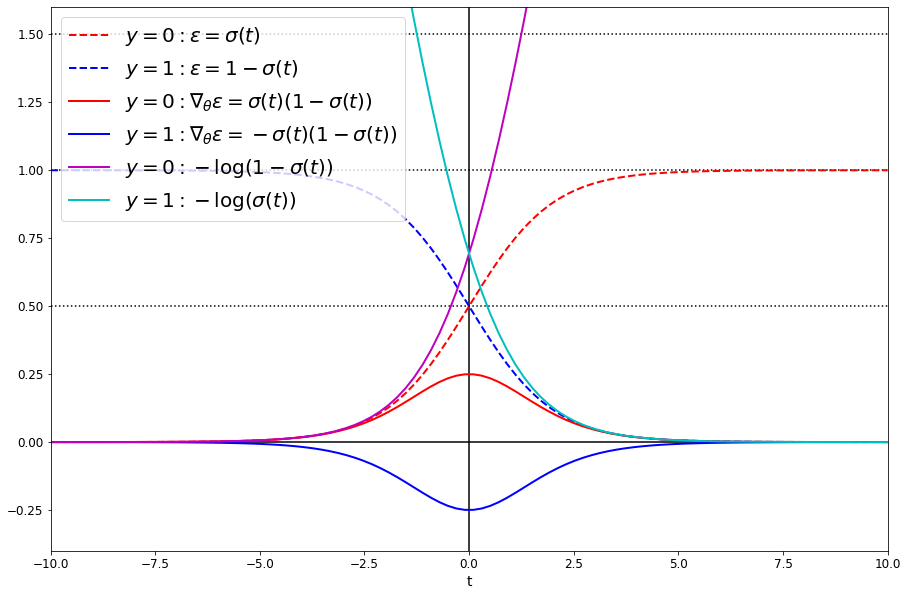

In [46]:
plot_sigmoid_gradients()

### (bstudent) A better loss / cost function for logistic fit

***(TODO: check veracity that this is an apples-to-apples example of author's observation)*** This is the type of case that agerion talked about earlier in the chapter, where the evaluation for training is not the evaluation used at test / runtime.  

Instead of the actual error $\epsilon_i(t)$ for sample $i$, consider a cost / loss function with better properties, e.g. at extreme values of $t$.

Note that I use $s(t)$ where ageron uses $\sigma(t)$ ...

$c(\theta) =
\begin{cases}
    &-\log(1 - s(t_i)) &\text{if } y_i = 0\\
        &-\log(s(t_i)) &\text{if } y_i = 1
\end{cases}$

$=(1-y_i)(-\log(1 - s(t_i))) + y_i(-\log(s(t_i)))$  

Where:  

$t_i=\mathbf X^T \theta$

And:

$s(t_i)=s(\mathbf X_i^T \theta)=\frac{1}{1+\exp(-t_i)}=\frac{1}{1+\exp(-\mathbf X_i^T \theta)}$

And:  

$-\log(s(t_i))=\log(1+\exp(-t_i))$  

$-\log(1 - s(t_i))=-\log(s(-t_i))=\log(1+\exp(t_i))$

$\therefore c(\theta) = (1-y_i)\log(1+\exp(t_i)) + y_i\log(1+\exp(-t_i))$  
  
$= (1-y_i)\log(1+\exp(X^T\theta)) + y_i\log(1+\exp(-X^T\theta))$  

Gradient:  

$\nabla_\theta c(\theta) = (1-y_i) s(\mathbf{x}_i^T\theta) \mathbf{x}_i - y_i s(-\mathbf{x}_i^T \theta) \mathbf{x}_i$

$= \left[(1-y_i) s(\mathbf{x}_i^T\theta) - y_i (1 - s(\mathbf{x}_i^T \theta)) \right] \mathbf{x}_i$  
$= \left[(1-y_i) s(t_i) - y_i (1 - s(t_i))\right] \mathbf{x}_i$  
$= \left[ s(t_i) - y_i s(t_i) - y_i + y_i s(t_i) \right] \mathbf{x}_i$  
$= \left[ s(t_i) - y_i \right] \mathbf{x}_i$  
$= \left[ s(\mathbf{x}_i^T\theta) - y_i \right] \mathbf{x}_i$  

This is in line with the result of eq 4-18 in the book, which shows element-wise derivative.  
Strangely, the e-book typesetting sucks for this textbook, but that doesn't matter because ageron provides all equations in $\LaTeX$ format, see:   
`book_equations.ipynb`  

### Summary of logistic regression cost function & gradient:

$c(\theta) =
\begin{cases}
    &-\log(1 - s(t_i)) &\text{if } y_i = 0\\
        &-\log(s(t_i)) &\text{if } y_i = 1
\end{cases}$

$=(1-y_i)(-\log(1 - s(t_i))) + y_i(-\log(s(t_i)))$  

Where:  

$t_i=\mathbf X^T \theta$

Gradient:  

$\nabla_\theta c(\theta) = (1-y_i) s(\mathbf{x}_i^T\theta) \mathbf{x}_i - y_i s(-\mathbf{x}_i^T \theta) \mathbf{x}_i$

$= \left[(1-y_i) s(\mathbf{x}_i^T\theta) - y_i (1 - s(\mathbf{x}_i^T \theta)) \right] \mathbf{x}_i$  
$= \left[(1-y_i) s(t_i) - y_i (1 - s(t_i))\right] \mathbf{x}_i$  
$= \left[ s(\mathbf{x}_i^T\theta) - y_i \right] \mathbf{x}_i$  

  --


### Eq **4-22** extends the above idea of log cost to multi-class loss:

*reproduced here from `book_equations.ipynb`:*  

**Equation 4-22: Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**Cross entropy between two discrete probability distributions $p$ and $q$ (page 141):**
$ H(p, q) = -\sum\limits_{x}p(x) \log q(x) $
*  
#### Eq **4-23**  gives the corresponding *gradient*  

*Equation 4-23: Cross entropy gradient vector for class $k$:  
$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$


## MISC

### demo np.c_

Shows that c has the nice property of turning vectors into columns, i.e. my intuitive bias was that the 0'th list element might need to have more than one dimension for this to work, but that is not the case!  

In [3]:
ones1 = np.ones((5,))
ones2 = 2*np.ones((5,))
ones3 = 3*np.ones((5,))

In [4]:
np.c_[ones1, ones2, ones3]

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

#### also demo np.r_

This result is counterintuitive, given the way np.c_ works above; IT is probably consistent in some way that would not elude a person smarter or more insightful than myself.

In [5]:
np.r_[ones1, ones2, ones3]

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.])

In [7]:
ones1T = ones1.reshape((1,5))
ones1T

array([[1., 1., 1., 1., 1.]])

In [8]:
# np.r_[ones1T, ones2, ones3]

## Q: what happens when you call `list(...)` with a `dataframe` argument?

In [9]:
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': list('uvwxy'), 'c': [5,10,15,20,25]})
df

,a,b,c
0,1,u,5
1,2,v,10
2,3,w,15
3,4,x,20
4,5,y,25


#### A: you get a list of the column names

In [10]:
list(df)

['a', 'b', 'c']

dict(...) on a data frame returns a dict of series:

In [11]:
dict(df)

{'a': 0    1
 1    2
 2    3
 3    4
 4    5
 Name: a, dtype: int64, 'b': 0    u
 1    v
 2    w
 3    x
 4    y
 Name: b, dtype: object, 'c': 0     5
 1    10
 2    15
 3    20
 4    25
 Name: c, dtype: int64}

In [13]:
type((dict(df)['a']))

pandas.core.series.Series

In [10]:
tups = list(zip(list(range(10)), np.array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703, 
                        9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]]).flatten()))
tups

[(0, 2.81585438),
 (1, 7.09167958),
 (2, 3.82972099),
 (3, 0.79365551),
 (4, 5.8885703),
 (5, 9.29718395),
 (6, 1.79862509),
 (7, 8.10392157),
 (8, -0.228207),
 (9, 4.83753243)]

Full derivation of sigmoid error gradient:

$\nabla_\theta \epsilon = \nabla_\theta y_i(1 - s(t)) + (1 - y_i)s(t)$  
$\dots = \left[ y_i(-s(t)(1-s(t))) + (1 - y_i)s(t)(1-s(t)) \right] \nabla_\theta t$  
$\dots = \left[ y_i s(t) ( s(t) - 1 ) + (1 - y_i) s(t)(1-s(t)) \right] \nabla_\theta t$
$\dots = \left[ y_i s(t)s(t) - y_i s(t) +  s(t)(1-s(t)) - y_i s(t)(1-s(t)) \right] \nabla_\theta t$
$\dots = \left[ y_i s(t)^2 - y_i s(t) +  s(t) - s(t))^2 - y_i s(t) + y_i s(t)^2 \right] \nabla_\theta t$  
$\dots = \left[ 2 y_i (s(t)^2 - s(t)) +  (s(t) - s(t))^2) \right] \nabla_\theta t$  
$\dots = \left[ (2 y_i -1) (s(t)^2 - s(t)) \right] \nabla_\theta t$  
$\dots = \left[ (1 - 2 y_i) s(t)(1 - s(t)) \right] \nabla_\theta t$  
$\dots = 
\begin{cases}
    &s(t)(1 - s(t)) \nabla_\theta t  & \text{if } y_i = 0\\
    &-s(t)(1 - s(t)) \nabla_\theta t &\text{if } y_i = 1
\end{cases}$


Scratch:

d/dx(a log(1 + exp(b x))) = (a b e^(b x))/(e^(b x) + 1)

del(theta) (1-y) log(1+exp(x^T theta)) = (1-y) x exp(x^T theta)/(1+exp(x^T theta)) = (1-y) x s(x^T theta)

d/dx(c log(1 + exp(-b x))) = -(b c)/(e^(b x) + 1)

del(theta) y log(1+exp(-x^T theta)) = -y x s(-x^T theta)
